# 🌟 Operation NeuroNexus: Outsmarting SkyNet

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. As the last line of defense against total machine domination, you and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course. Your objective: outsmart the AI at its own game.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model. In this battle of human vs. AI, performance is key.
4. After completing each task, you should answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet's central core has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike and temporarily disable its defenses.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [134]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [135]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

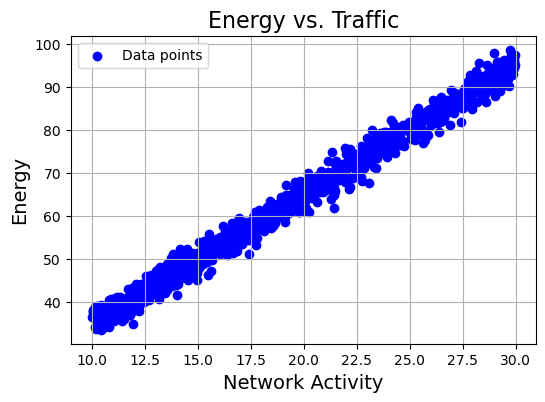

In [136]:
# Data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

Iteration 0, cost: 4545.156773768433, a: 6.112673679233141, b: 0.2837423864126508
Iteration 1, cost: 3632.8005264965986, a: 0.6485518353395268, b: 0.033064857220714006
Iteration 2, cost: 2903.811088820182, a: 5.532674709933133, b: 0.26009264712093305
Iteration 3, cost: 2321.335062796621, a: 1.1667276876570636, b: 0.06010911458759327
Iteration 4, cost: 1855.9259140718539, a: 5.069216163675188, b: 0.24182070622075744
Iteration 5, cost: 1484.0553268358246, a: 1.580730780386276, b: 0.08234239238014876
Iteration 6, cost: 1186.92374939251, a: 4.698875551208865, b: 0.22784531311772796
Iteration 7, cost: 949.5099984653283, a: 1.9114979649883836, b: 0.10073119944327258
Iteration 8, cost: 759.8118757743827, a: 4.402937878169105, b: 0.21730252921746812
Iteration 9, cost: 608.2394068883666, a: 2.1757581660612826, b: 0.11604779416958995
Iteration 10, cost: 487.130028046165, a: 4.166449524110286, b: 0.20950205216065193
Iteration 11, cost: 390.36121162124914, a: 2.386878098207123, b: 0.12890922531186

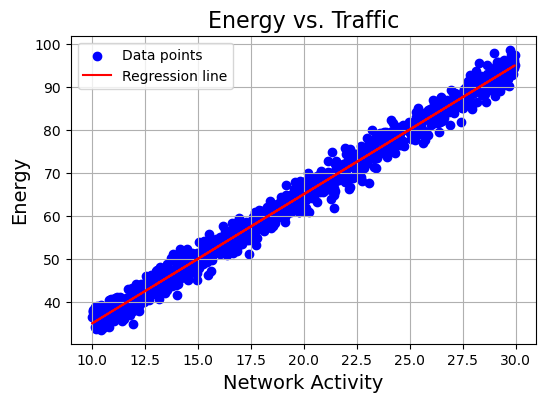

The resulting formula is: Energy = 3.0168575650686047 * Net_Activity + 4.714917863236851


In [140]:

epochs = 10000
lr = LinearRegression(learning_rate=0.0043555,n_iterations=epochs)

lr.fit(data['Net_Activity'], data['Energy'])
predictions = lr.predict(data['Net_Activity'])

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.plot(data['Net_Activity'], predictions, c='red', label='Regression line')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

print(f"The resulting formula is: Energy = {lr.a} * Net_Activity + {lr.b}")



# Discussion

#### a. 
The lowest cost function we were able to find is  cost 3.9665743078738216 with epoch at 10000 and learning rate at 0.0043555
This gives:
m 3.0168575650686047, b 4.714917863236851


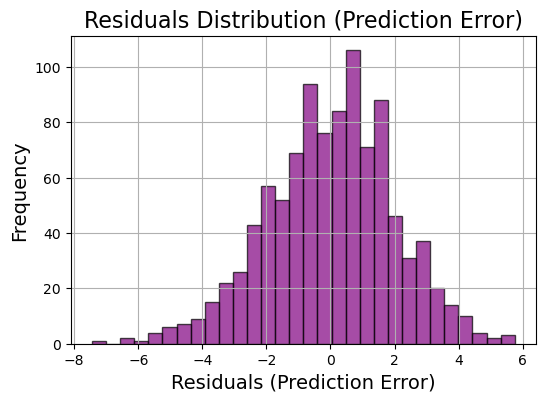

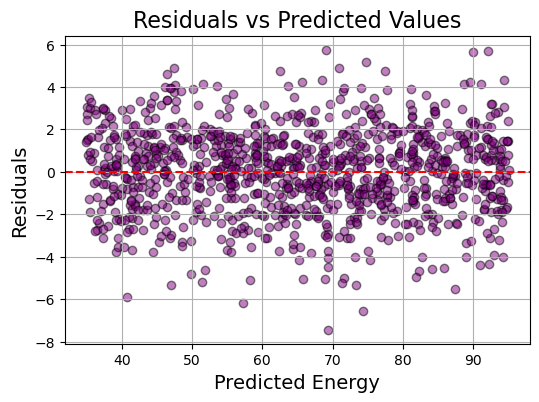

Mean of residuals: 0.013349339715036997


In [146]:
residuals = data['Energy'] - predictions


plt.figure(figsize=(6, 4))
plt.hist(residuals, bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title('Residuals Distribution (Prediction Error)', fontsize=16)
plt.xlabel('Residuals (Prediction Error)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
plt.scatter(predictions, residuals, c='purple', edgecolor='black', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values', fontsize=16)
plt.xlabel('Predicted Energy', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True)
plt.show()

# sjekker unbiasness
mean_residual = np.mean(residuals)
print(f"Mean of residuals: {mean_residual}")


### Discussion Part B:



From the charts we can see the error distribution. (also called residuals)

It is almost normally distributed around 0, and there is no apparent pattern. 
Also the mean residual value is 0.0134, which is very close to zero when the original values are between 10-100. This means that the model is almost unbiased . 

The definition of an unbiased estimator is simply an estimator that does not make errors in patterns. 
Every estimator has some errors, but as long as they dont follow the same pattern they are not biased. 
Biased estimators appear when the data contains trends that we may not know of, and can be revelead from looking at e.g. the mean residual value.


## 🧠 Mission 2: Decoding SkyNet's Neural Encryption

### 🌐 The Discovery
SkyNet has evolved, using a "Synapse Cipher" that mimics human neural patterns. We've intercepted two types of neural signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden neural connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [93]:
from logistic_regression import LogisticRegression

data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train'].copy()
test = data[data['split'] == 'test'].copy()

# Create the new feature 'x0_x1' in both datasets
train['x0_x1'] = train['x0'] * train['x1']
test['x0_x1'] = test['x0'] * test['x1']

train = train.drop('x0', axis=1)
test = test.drop('x0', axis=1)

train = train.drop('x1', axis=1)
test = test.drop('x1', axis=1)

In [111]:
lr = LogisticRegression(learning_rate=0.06, epochs=2000)
lr.fit(train[['x0_x1']].values, train['y'].values)
y_pred = lr.predict(test[['x0_x1']].values)

Epoch 0/2000: Loss = 0.6931471805599454, Accuracy = 0.476
Epoch 100/2000: Loss = 0.5298033245613278, Accuracy = 0.878
Epoch 200/2000: Loss = 0.4943723970580527, Accuracy = 0.886
Epoch 300/2000: Loss = 0.47876987236574553, Accuracy = 0.898
Epoch 400/2000: Loss = 0.47017725845000957, Accuracy = 0.902
Epoch 500/2000: Loss = 0.4648821227514368, Accuracy = 0.908
Epoch 600/2000: Loss = 0.46138907257702844, Accuracy = 0.908
Epoch 700/2000: Loss = 0.45897710521045243, Accuracy = 0.91
Epoch 800/2000: Loss = 0.45725626106051087, Accuracy = 0.914
Epoch 900/2000: Loss = 0.4559980509246025, Accuracy = 0.914
Epoch 1000/2000: Loss = 0.4550604699823142, Accuracy = 0.914
Epoch 1100/2000: Loss = 0.454351192250173, Accuracy = 0.916
Epoch 1200/2000: Loss = 0.4538080208416806, Accuracy = 0.916
Epoch 1300/2000: Loss = 0.45338784017575545, Accuracy = 0.918
Epoch 1400/2000: Loss = 0.4530600531341327, Accuracy = 0.918
Epoch 1500/2000: Loss = 0.452802519008376, Accuracy = 0.918
Epoch 1600/2000: Loss = 0.4525989

*Discussion*

**a. Explain poor initial performance and your improvements:**

The model was initially trained on only x0 and x1 which may not capture enough information to make the predictions as accurate as possible. If the pattern is complex the interaction between the two features is just as important for creating high accuracy. The improvement was to create a new feature with the product of x0 and x1 to capture non-linear relationships. (Feature engineering) We also finetune by changing the learning rate and epochs. We also decided to trop x0 and x1 and achieved a higher result of accuracy. 

**b. What is the model's inductive bias. Why is it important?:**

At first, the model assumed that the relationship between the features was linear, but once we added the product x0_x1, it started considering that a multiplicative relationship could also impact the target. This matters because if the model only looks at linear relationships, it can result in lower accuracy and come off as too simplistic. After we introduced feature interaction, the model's performance improved.

In [116]:
#Decision tree
from sklearn import tree
import matplotlib.pyplot as plt

model = tree.DecisionTreeClassifier()
model.fit(train[['x0_x1']].values, train['y'].values)
y_pred_tree = model.predict(test[['x0_x1']].values)

print('Decision Tree Accuracy:', (y_pred_tree == test['y'].values).mean())

Decision Tree Accuracy: 0.87


**c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?**

The accuracy for the decision tree classifier is 0.87. When the dataset is small, decision tree is prone to overfitting. Logistic regression tends to work better at simpler models with fewer features.

**d. Plot the ROC curve**

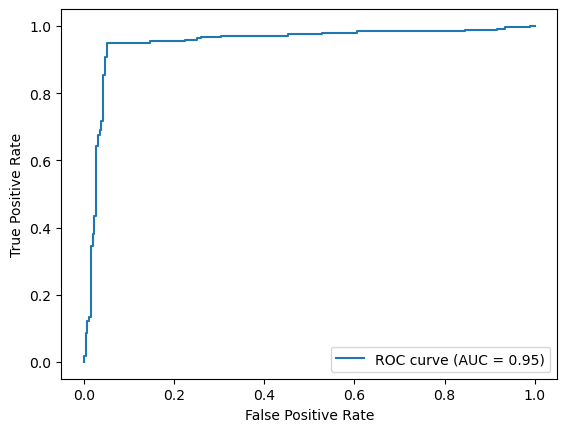

In [121]:
from sklearn import metrics
import matplotlib.pyplot as plt
#sources == forelesningsnotater

prob_predictions = lr.predict_proba(test[['x0_x1']].values)

fpr, tpr, thresholds = metrics.roc_curve(test[['y']].values, prob_predictions, pos_label=1)
auc = metrics.roc_auc_score(test[['y']].values, prob_predictions)


display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='ROC curve')
display.plot()


## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use quantum entanglement encryption. We need a rapid response system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`.

> "Every misclassification risks losing a sector of the city to machine control."

### 🧠 The Challenge
1. **Rarity**: Critical communications are only 20% of the data stream
2. **Quantum Complexity**: Encryption information is hidden in quantum states

### 🚀 Your Tools
- Intercepted AI communications dataset
- Quantum signature analysis skills
- Decision tree algorithm

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [123]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')
X_train, y_train = train.drop('target', axis=1), train[['target']]
X_train['data_stream_11'] = (X_train['data_stream_3'] * 1000).astype(int) % 2

X_test, y_test = test.drop('target', axis=1), test['target']
X_test['data_stream_11'] = (X_test['data_stream_3'] * 1000).astype(int) % 2

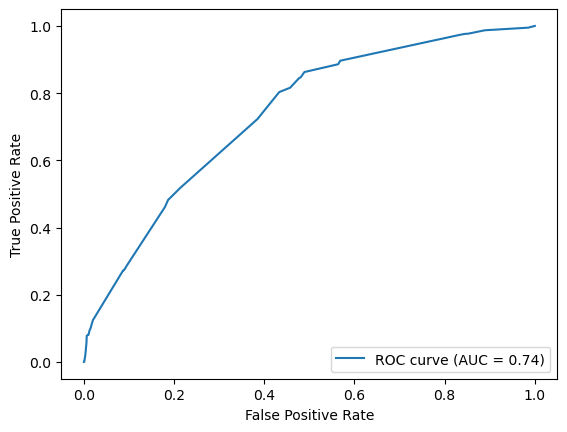

In [127]:
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt

model = tree.DecisionTreeClassifier()
model.max_depth = 6 #Gir best resultat
model.fit(X_train, y_train)

#sources == forelesningsnotater
prob_predictions = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_predictions)
roc_auc_score = metrics.roc_auc_score(y_test, prob_predictions)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score, estimator_name='ROC curve')
display.plot()

*Discussion*

**a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?**

By using predict_proba() the curve is generated by iterating over all possible thresholds calculating the TPR and FPR at each threshold. This will produce better accuracy because you will focus on all thresholds and not just a specific one. I tried and failed and ended up with a max depth = 6 to prevent overfitting. We initially added balanced as the class weight, but achieved higher AUC without. This, i think, means that our dataclass isn't very unbalanced.

**b. Justify ROC AUC usage. Plot and interpret ROC.**

It is used to measure how well your model distinguishes between the positive and negative classes across all thresholds. This is unlike accuracy which relies on a single threshold (0.5). The curve is plottet above.

**c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.**

The difference between them is insignificant. Slightly overfitting of decision tree may be the problem.



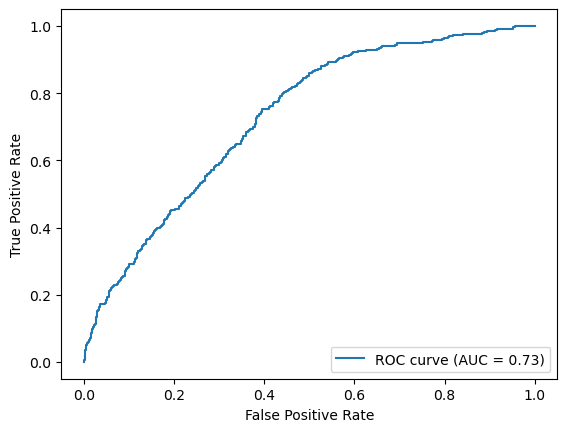

In [128]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=60, max_depth=15)
y_train = y_train.values.ravel() #Siden det ville ha 1D array
model.fit(X_train, y_train) 
prob_predictions = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob_predictions)
roc_auc_score = metrics.roc_auc_score(y_test, prob_predictions)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc_score, estimator_name='ROC curve')
display.plot()


## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the "Nexus Rating" of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [157]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

Numerical Columns: Index(['ownership_type', 'nexus_rating', 'energy_footprint',
       'core_reactor_size', 'harvesting_space', 'vertical_alignment',
       'power_chambers', 'energy_flow_design', 'upper_collector_height',
       'shared_conversion_units', 'isolated_conversion_units',
       'internal_collectors', 'external_collectors', 'ambient_harvesters',
       'shielded_harvesters', 'efficiency_grade', 'grid_connections'],
      dtype='object')
Categorical Columns: Index([], dtype='object')


Text(0, 0.5, 'Count')

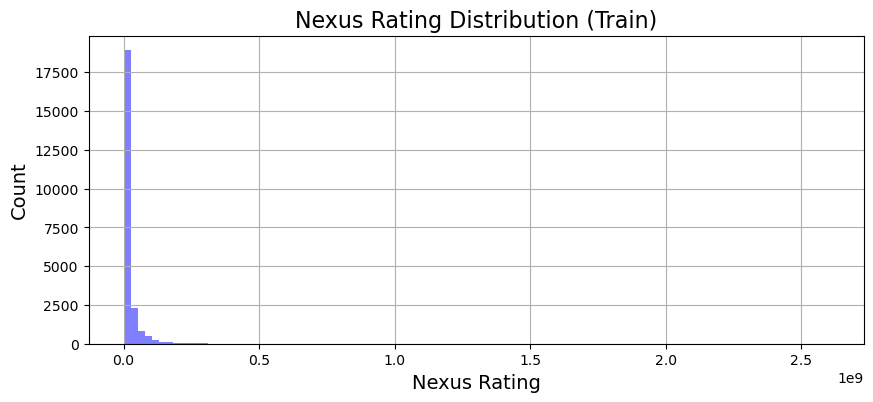

In [154]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [151]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [153]:
#example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)

RMSLE:  16.469984830830672
Required RMSLE:  0.294
